## Train QuickNAT
Working code! Details coming soon!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from quickNat_pytorch.quickNAT import quickNAT
from quickNat_pytorch.data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
train_data, test_data = get_imdb_data()
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

(3240, 256, 256)
27.0
0.0
Train size: 1890
Test size: 1350


In [7]:
from quickNat_pytorch.quickNAT import quickNAT
from quickNat_pytorch.solver import Solver
from quickNat_pytorch.net_api import squeeze_excitation as se


train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=2, shuffle=False, num_workers=4)

param ={
        'num_channels':1,
        'num_filters':64,
        'kernel_h':5,
        'kernel_w':5,
        'kernel_c': 1,
        'stride_conv':1,
        'pool':2,
        'stride_pool':2,
        'num_class': 28,
        'se_block' : se.SELayer.None, # Valid options : se.SELayer.NONE, se.SELayer.CSE, se.SELayer.SSE, se.SELayer.CSSE
        'drop_out' : 0.2 # Keep 0 for no dropout
    }

exp_dir_name = 'Exp02_try3'

quicknat_model = quickNAT(param)
solver = Solver(optim_args={"lr": 1e-2})
solver.train(quicknat_model, train_loader, val_loader, log_nth=1, num_epochs=10, exp_dir_name=exp_dir_name)

START TRAIN.
[Iteration : 0] : 5.569219589233398
[Iteration : 50] : 1.291003704071045
[Iteration : 100] : 1.1507240533828735
[Iteration : 150] : 1.2168679237365723
[Iteration : 200] : 1.1308543682098389
[Iteration : 250] : 1.0466498136520386
[Iteration : 300] : 1.192547082901001
[Iteration : 350] : 0.9412102103233337
[Iteration : 400] : 1.0607479810714722
[Iteration : 450] : 1.1185009479522705
[Iteration : 500] : 0.9211529493331909
[Iteration : 550] : 0.9841406345367432
[Iteration : 600] : 1.013573169708252
[Iteration : 650] : 0.905174732208252
[Iteration : 700] : 0.9079746603965759
[Iteration : 750] : 0.9454309344291687
[Iteration : 800] : 0.8734065890312195
[Iteration : 850] : 0.9322116374969482
[Iteration : 900] : 0.822444498538971
[Epoch : 0/1] : 0.9332430958747864
Saving model... models/Exp02_try3/quicknat_epoch1.model
FINISH.


## Save the Model

When you are satisfied with your training, you can save the model.

In [8]:
quicknat_model.save("models/Exp02_try3/quicknat_model.model")

Saving model... models/Exp02_try3/quicknat_model.model


# Deploy Model on Test Data

In [72]:
test_data.X.shape

(1350, 1, 256, 256)

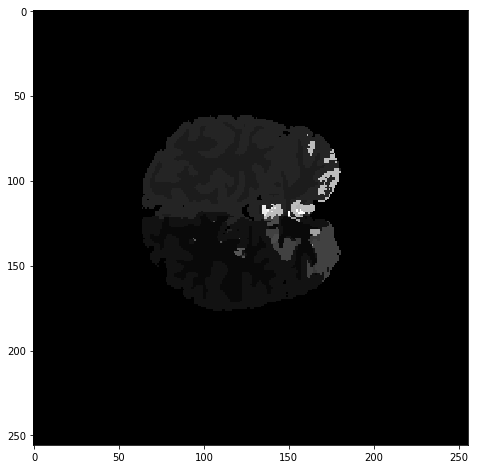

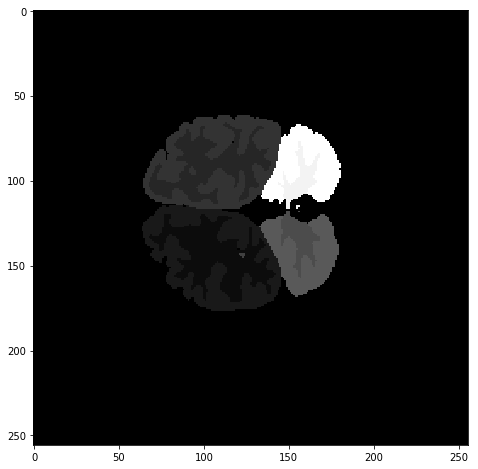

In [12]:
import matplotlib.pyplot as plt

quick_model = torch.load('models/Exp02_try3/quicknat_epoch1.model')
quick_model = quick_model.eval()
with torch.no_grad():
    test_input = Variable(torch.Tensor(test_data.X[200:201]).cuda())
quick_model.enable_test_dropout()
out = quick_model(test_input)
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
idx = np.squeeze(idx)
plt.imshow(idx)
plt.show()

img_test = test_data.y[200:201]
img_test = np.squeeze(img_test)
plt.imshow(img_test)
plt.show()